# Zad 05 - `Zadanie_twarzy`

**Temat:** Analiza "eigenfaces"

 ## **Treść zadania**

Zadanie dotyczy liczby r wartości własnych (i odpowiednio "twarzy wlasnych") używając które możemy zachować więcej niż k% informacji zawartej w zdjęciu (określonym w wariantach do pierwszego zajęcia). Przedstawić wynikowe zdjęcie z użyciem odpowiedniej liczby eigenfaces.

**Wariant zadania: `14`**

$ k = 45 $

![14.webp](../common_files/14.webp)

### Kod Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

INPUT_IMAGE_PATH = "../common_files/14.webp"
OUTPUT_IMAGE_PATH = "14-compressed.webp"

# Wczytanie danych treningowych
mat_contents = scipy.io.loadmat("allFaces.mat")
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# Użycie pierwszych 36 osób do treningu
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces, axis=1)  # średnia twarz

# Obliczanie eigenfaces na danych treningowych (po odjęciu średniej)
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)

In [2]:
# 1. Obliczanie skumulowanego udziału wartości osobliwych
S_diag = np.diag(S)
cumulative_variance = np.cumsum(S_diag) / np.sum(S_diag)

# 2. Znalezienie r dla k = 45%
k = 45  # wartość k dla wariantu 14
target_threshold = k / 100.0
r = np.argmax(cumulative_variance > target_threshold) + 1
print(f"Dla k = {k}% potrzeba r = {r} eigenfaces")
print(f"Skumulowana wariancja dla r = {r}: {cumulative_variance[r-1]*100:.2f}%")

Dla k = 45% potrzeba r = 184924 eigenfaces
Skumulowana wariancja dla r = 184924: 45.01%


In [3]:
# 3. Wczytanie obrazu testowego (14.webp)

if os.path.exists(INPUT_IMAGE_PATH):
    # Wczytanie i przetworzenie obrazu
    img = Image.open(INPUT_IMAGE_PATH).convert('L')  # konwersja do skali szarości
    img = img.resize((n, m))  # dostosowanie rozmiaru
    testFace = np.array(img).flatten()  # spłaszczenie do wektora
    testFace = testFace.astype(np.float64)
    print("Wczytano obraz testowy:", INPUT_IMAGE_PATH)
else:
    # Jeśli plik nie istnieje, użycie domyślnego (twarz osoby 37)
    testFace = faces[:, np.sum(nfaces[:36])]
    print("Użyto domyślnego obrazu testowego (twarz osoby 37)")

Wczytano obraz testowy: ../common_files/14.webp


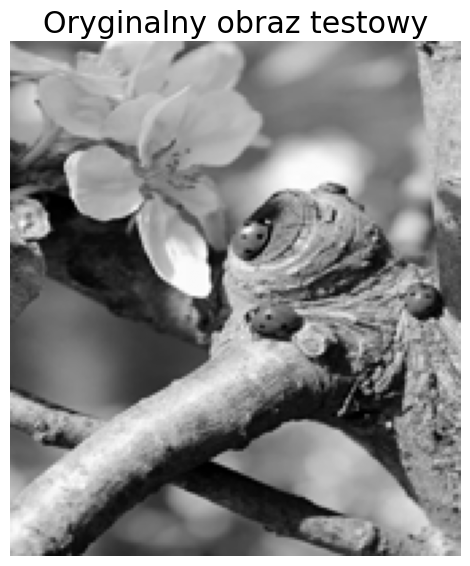

In [4]:
# 4. Wyświetlenie oryginalnego obrazu testowego
plt.figure(figsize=(6, 6))
plt.imshow(np.reshape(testFace, (m, n)).T, cmap='gray')
plt.title('Oryginalny obraz testowy')
plt.axis('off')
plt.tight_layout()
plt.show()

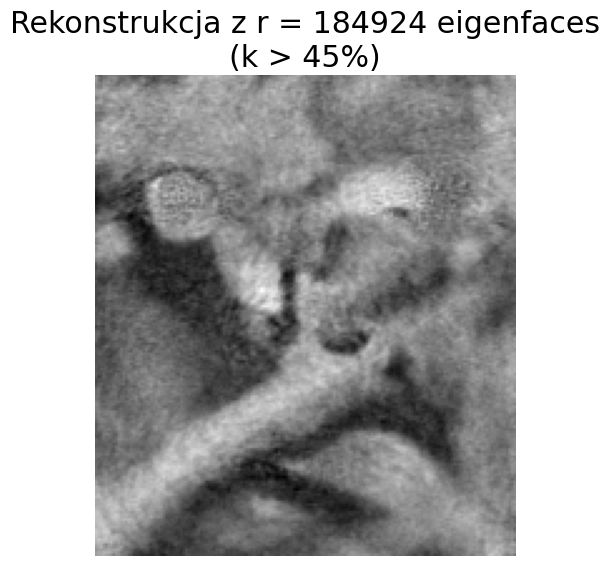

In [5]:
# 5. Rekonstrukcja obrazu testowego z użyciem znalezionego r
testFaceMS = testFace - avgFace
reconFace = avgFace + U[:, :r] @ U[:, :r].T @ testFaceMS

# Wyświetlenie zrekonstruowanego obrazu
plt.figure(figsize=(6, 6))
plt.imshow(np.reshape(reconFace, (m, n)).T, cmap='gray')
plt.title(f'Rekonstrukcja z r = {r} eigenfaces\n(k > {k}%)')
plt.axis('off')
plt.tight_layout()
plt.show()

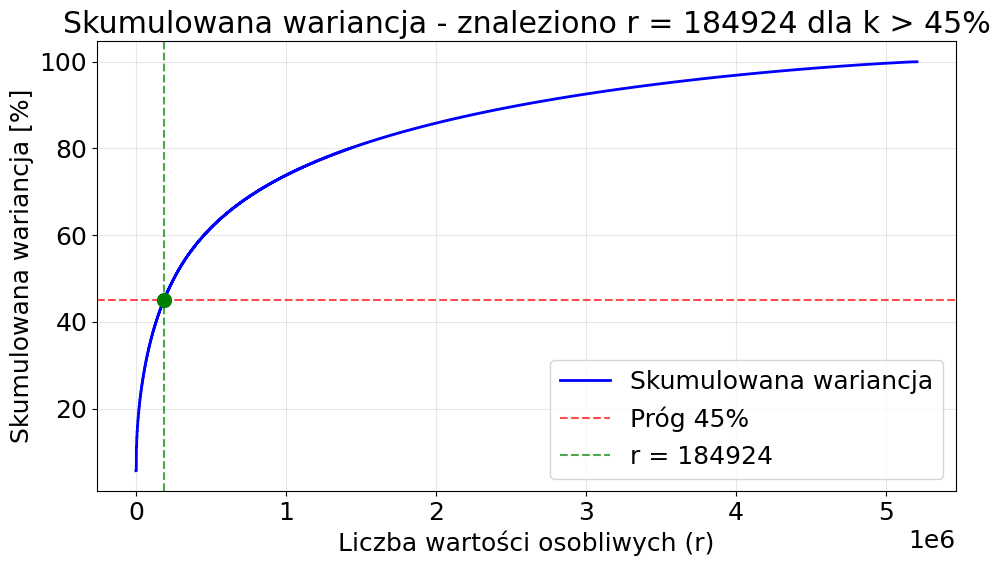

In [6]:
# 6. Wykres skumulowanej wariancji z zaznaczeniem r
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance * 100, 'b-', linewidth=2, label='Skumulowana wariancja')
plt.axhline(y=k, color='r', linestyle='--', alpha=0.7, label=f'Próg {k}%')
plt.axvline(x=r-1, color='g', linestyle='--', alpha=0.7, label=f'r = {r}')
plt.plot(r-1, cumulative_variance[r-1]*100, 'go', markersize=10)
plt.xlabel('Liczba wartości osobliwych (r)')
plt.ylabel('Skumulowana wariancja [%]')
plt.title(f'Skumulowana wariancja - znaleziono r = {r} dla k > {k}%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
print("\n" + "="*60)
print("PODSUMOWANIE:")
print(f"Wariant zadania: k = {k}%")
print(f"Znaleziona liczba eigenfaces: r = {r}")
print(f"Zachowana wariancja: {cumulative_variance[r-1]*100:.2f}%")
print("="*60)


PODSUMOWANIE:
Wariant zadania: k = 45%
Znaleziona liczba eigenfaces: r = 184924
Zachowana wariancja: 45.01%
